In [31]:
import numpy as np
import scipy.io
import seaborn as sns

from matplotlib import animation
import matplotlib.pyplot as plt
import seaborn as sns # named from Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing.
import pandas as pd
import os

directory = '/Users/mkals/data/OximeterTestingData/Logs'

fs = [f'{directory}/{f}' for f in os.listdir(directory)]
csv_files = [f for f in fs if '.csv' in f]

print(len(csv_files))

df = pd.read_csv(csv_files[0])
print(df.head())



3
       utc_time     red  beat_red  pulse_red  pulse_red_threshold  red_sig  \
0  1.625136e+09 -6815.0       0.0      100.0                 20.0  -6815.0   
1  1.625136e+09 -8660.0       0.0      100.0                 20.0  -8660.0   
2  1.625136e+09 -9379.0       0.0      100.0                 20.0  -9379.0   
3  1.625136e+09 -9537.0       0.0      100.0                 20.0  -9537.0   
4  1.625136e+09 -9417.0       0.0      100.0                 20.0  -9417.0   

    ir_sig        r        i  SPO2  beatAvg  rollHrAvg  SPO2Avg  
0   6719.0  11762.0  57979.0   0.0      0.0        0.0      0.0  
1   9993.0  11759.0  57981.0   0.0      0.0        0.0      0.0  
2  12727.0  11742.0  57977.0   0.0      0.0        0.0      0.0  
3  15142.0  11754.0  57976.0   0.0      0.0        0.0      0.0  
4  17356.0  11731.0  57956.0   0.0      0.0        0.0      0.0  


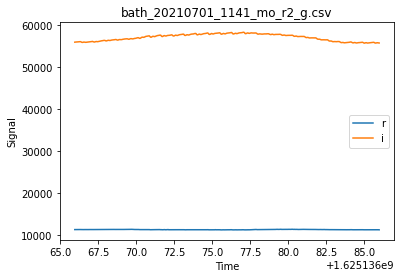

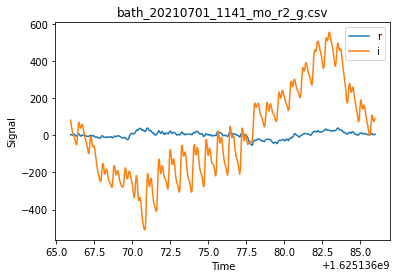

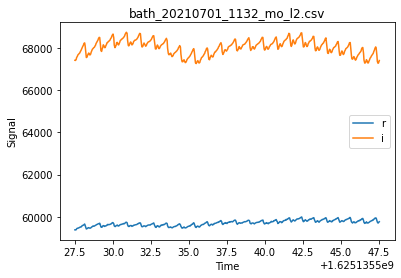

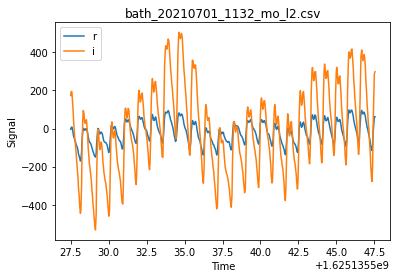

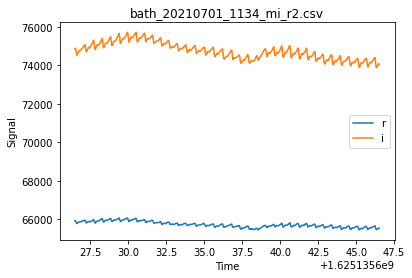

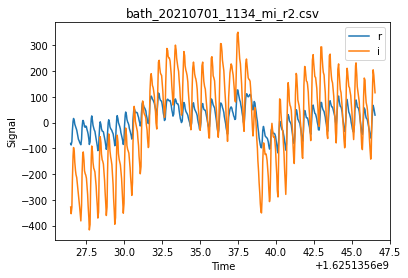

In [32]:
def plot_processed(f):
    title = f.split('/')[-1]
    df = pd.read_csv(f)
    df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.red_sig)
    plt.plot(df.utc_time, df.ir_sig)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])

def plot_raw(f):
    title = f.split('/')[-1]
    df = pd.read_csv(f)
    df.drop(df.iloc[:1000,:].index.tolist(), inplace=True)
    plt.plot(df.utc_time, df.r)
    plt.plot(df.utc_time, df.i)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal')
    plt.legend(['r', 'i'])


for f in csv_files:
    plt.figure()
    plot_raw(f)
    plt.figure()
    plot_processed(f)